<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/Wine Classification Starter Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>🍷 Wine Quality Classification Starter Guide</h1></center>
<hr style="border-width:2px;border-color:#75DFC1">


## 🎯 Objective
You are a Data Scientist at a winery. Your task is to **predict the quality of wine** (integer scores such as 3–8) based on its physicochemical properties.  
You will experiment with **multiple classification techniques** and compare their performance.

---
This notebook is a **starter guide** for the Wine Quality Classification competition.  
It provides the basic structure you can build upon:
1. Load and explore the dataset  
2. Preprocess and split the data  
3. Train a simple model  
4. Generate a submission file  

In [1]:
# 📚 Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import mode

import warnings
warnings.filterwarnings("ignore")


* **(b)** Read the `'winequality.csv'` file in a dataframe named **`df`**.
* **(c)** Extract from the DataFrame **df** the quality of the wine **y**, and the rest of the columns in **X**.


In [2]:
# === 1. Load Data ===
url = "" # "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/"
df = pd.read_csv(url+"train.csv", sep=',', index_col='id')  # Replace with your dataset
display(df)
X = df.drop(columns=['quality'])
y = df['quality']  # Multiclass labels (e.g., 3–8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
id,,,,,,,,,,,,
0,5.986500,0.281967,0.419604,10.832288,0.046696,55.477764,150.590385,0.993946,3.092111,0.590847,10.920676,3
1,5.421364,0.527669,0.171727,2.833312,0.034760,34.808504,126.733891,0.988669,3.196534,0.527903,13.261434,8
2,7.079385,0.239195,0.396151,1.741136,0.035217,31.588860,127.237085,0.990705,3.293212,0.417838,12.217271,8
3,7.324859,0.293670,0.348868,1.598075,0.054197,32.279923,148.281022,0.991828,3.181351,0.468004,10.648563,5
4,6.480897,0.322427,0.347538,5.607307,0.043802,27.508774,93.000700,0.991914,3.283934,0.604405,11.983263,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,6.513248,0.623897,0.198464,8.601996,0.045779,80.872528,222.952925,0.995917,3.166280,0.451464,9.269211,5
3894,6.840022,0.371525,0.671189,1.542483,0.174319,17.352208,99.098644,0.992053,3.052852,0.559263,10.438432,6
3895,7.817196,0.266808,0.416424,15.147259,0.043066,38.296743,212.894019,0.997571,2.951292,0.600379,9.903779,6


* **(e)** Display a heatmap of the correlations between each pair of variables in **`df`** , with 0 as the center and using the `'RdBu_r'` palette.


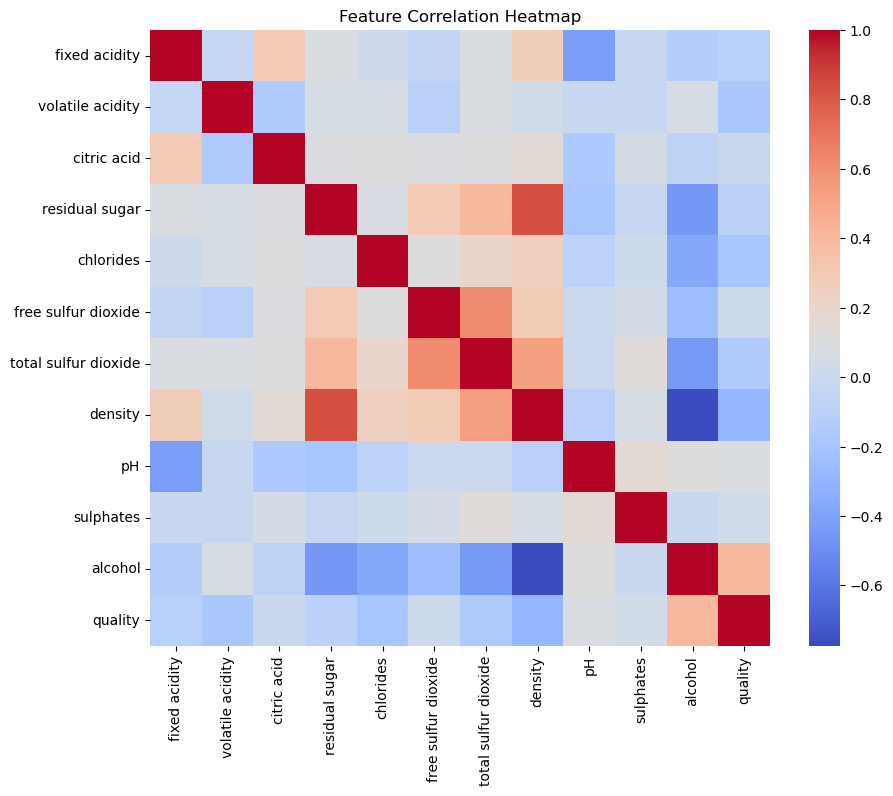

In [3]:
# === 2. Heatmap ===
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


* **(d)** Separate the data into a learning set **(X_train,y_train)** and a test set **(X_test,y_test)** containing 30% of the total data.
> *NB: Add `random_state = 42` for the reproducibility of the results*

In [4]:
# === 3. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
# === 4. Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# === 5. Evaluation Function and Results Storage ===

results1 = []

def evaluate_model(name, y_true, y_pred):
    results = []
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"{name} - Accuracy: {acc:.3f}, Macro F1-score: {f1:.3f}")
    labels_sorted = np.unique(y_true)  # les labels réels, par ex. [3,4,5,6,7,8]
    cm = confusion_matrix(y_true, y_pred, labels=labels_sorted)
    ConfusionMatrixDisplay(cm, display_labels=labels_sorted).plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    return {'Model': name, 'Accuracy': acc, 'F1-score': f1}

<hr style="border-width:2px;border-color:#75DFC1">
<center><h3>Training and Prediction with different models</h3></center>
<hr style="border-width:2px;border-color:#75DFC1">

Logistic Regression - Accuracy: 0.516, Macro F1-score: 0.223


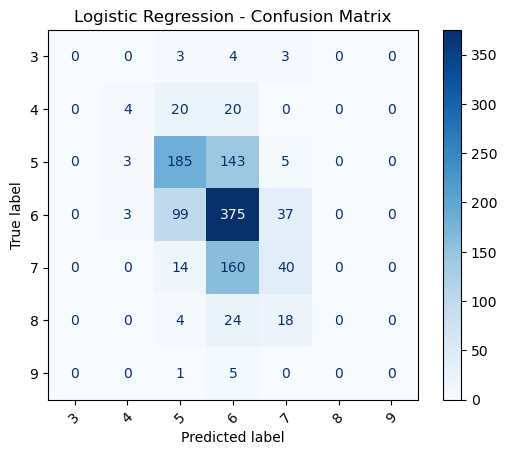

In [7]:
# === 6. Logistic Regression ===
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
results1.append(evaluate_model("Logistic Regression", y_test, y_pred_lr))

SVM - Accuracy: 0.529, Macro F1-score: 0.210


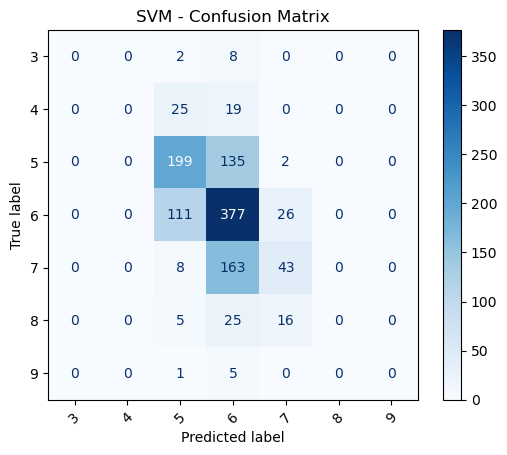

In [8]:
# === 7. SVM ===
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
results1.append(evaluate_model("SVM", y_test, y_pred_svm))

kNN - Accuracy: 0.529, Macro F1-score: 0.248


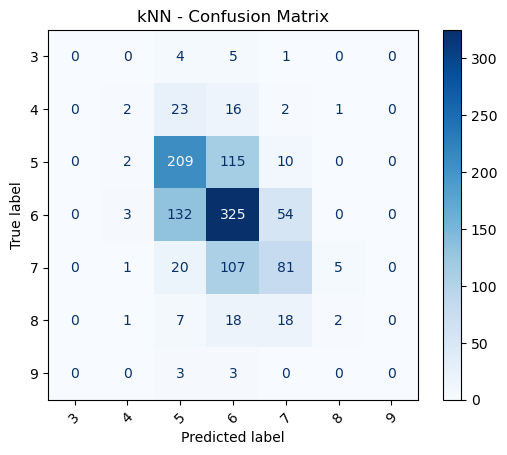

In [9]:
# === 8. kNN ===

# Distance       | Paramètres
#==========================================
# Euclidienne    | metric='minkowski', p=2
# Manhattan (L1) | metric='minkowski', p=1
# Chebyshev (L∞) | metric='chebyshev'
# Cosine         |metric='cosine'
# Mahalanobis    |metric='mahalanobis', metric_params={'V': cov} 

knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
results1.append(evaluate_model("kNN", y_test, y_pred_knn))

Decision Tree - Accuracy: 0.479, Macro F1-score: 0.283


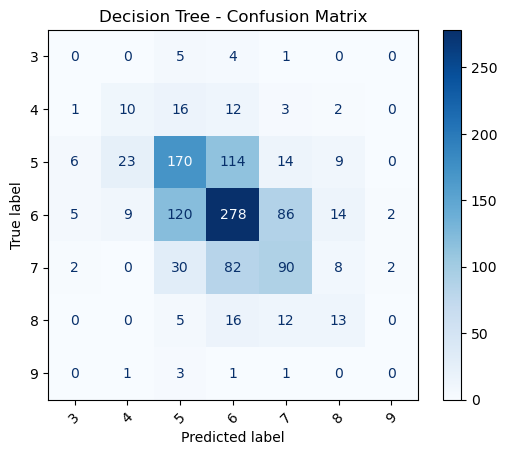

In [10]:
# === 9. Decision Tree ===
tree_clf = DecisionTreeClassifier(
    criterion='gini',   # ou 'entropy'
    max_depth=None,     # None = profondeur illimitée
    random_state=42
)
tree_clf.fit(X_train_scaled, y_train)
y_pred_tree = tree_clf.predict(X_test_scaled)
results1.append(evaluate_model("Decision Tree", y_test, y_pred_tree))


Random Forest - Accuracy: 0.615, Macro F1-score: 0.330


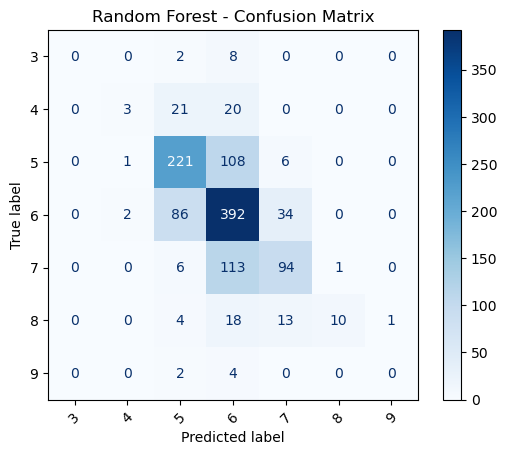

In [11]:
# === 10. Random Forest ===
rf_clf = RandomForestClassifier(
    n_estimators=100,   # nombre d’arbres
    max_depth=None, 
    random_state=42,
    n_jobs=-1          # utilise tous les cœurs pour accélérer
)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf = rf_clf.predict(X_test_scaled)
results1.append(evaluate_model("Random Forest", y_test, y_pred_rf))

KMeans - Accuracy: 0.470, Macro F1-score: 0.196


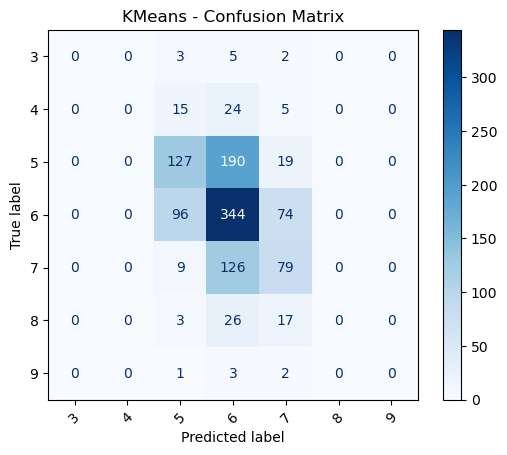

In [12]:
# === 11. KMeans (Unsupervised) ===
unique_classes = np.unique(y_train)
kmeans = KMeans(n_clusters=len(unique_classes), random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_test_scaled)

# Map clusters to true labels
def cluster_mapping(cluster_labels,y):
    mapping = {}
    for c in np.unique(cluster_labels):
        mask = (cluster_labels == c)
        if np.sum(mask) > 0:
            mapping[c] = mode(y[mask], keepdims=True).mode[0]
    return mapping
    
mapping = cluster_mapping(cluster_labels,y_test)
cluster_mapped = np.array([mapping[c] for c in cluster_labels])
results1.append(evaluate_model("KMeans", y_test, cluster_mapped))



37/37 [==============================] - 0s 942us/step
Neural Network - Accuracy: 0.370, Macro F1-score: 0.137


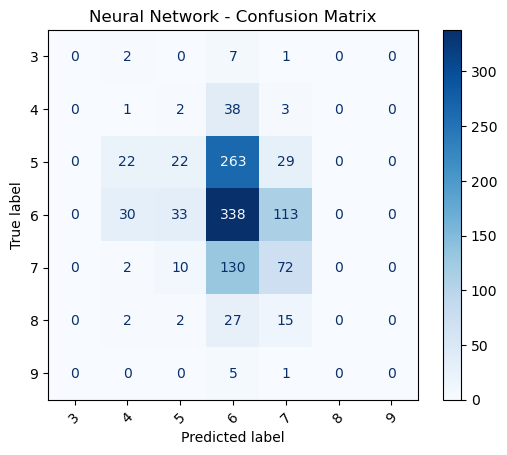

In [13]:
# === 12. Simple Neural Network ===
model = Sequential()
model.add(Dense(5, input_dim=X_train_scaled.shape[1], activation='relu'))

model.add(Dense(len(unique_classes), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Re-index labels to start at 0
label_offset = min(unique_classes)
y_train_nn = y_train - label_offset
y_test_nn = y_test - label_offset

model.fit(X_train_scaled, y_train_nn, epochs=1, batch_size=16, verbose=0)

y_pred_nn = model.predict(X_test_scaled)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1) + min(unique_classes)
# Adjust labels if classes are not starting at 0
y_pred_nn_adj = np.argmax(y_pred_nn, axis=1) + label_offset

results1.append(evaluate_model("Neural Network", y_test, y_pred_nn_adj))

<hr style="border-width:2px;border-color:#75DFC1">
<center><h3>Comparison of model effectiveness</h3></center>
<hr style="border-width:2px;border-color:#75DFC1">


📊 Model Comparison for train set
                 Model  Accuracy  F1-score
4        Random Forest  0.615385  0.329953
1                  SVM  0.529060  0.210026
2                  kNN  0.529060  0.247807
0  Logistic Regression  0.516239  0.223119
3        Decision Tree  0.479487  0.282995
5               KMeans  0.470085  0.196064
6       Neural Network  0.370085  0.137262


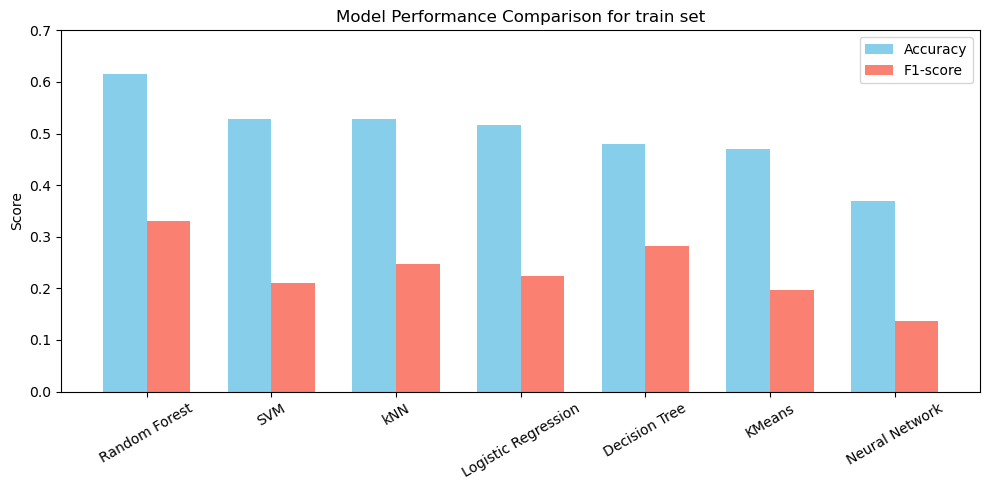

In [14]:
# === 13. Comparison Table ===
def models_comparison(results,desc):
    comparison_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
    print("\n📊 Model Comparison"+desc)
    print(comparison_df)

    # Optional: Bar plot for visual comparison
    # === Bar plot for visual comparison (side-by-side) ===

    x = np.arange(len(comparison_df['Model']))  # positions des modèles
    width = 0.35  # largeur des barres

    plt.figure(figsize=(10,5))
    plt.bar(x - width/2, comparison_df['Accuracy'], width, label='Accuracy', color='skyblue')
    plt.bar(x + width/2, comparison_df['F1-score'], width, label='F1-score', color='salmon')

    plt.ylabel('Score')
    plt.title('Model Performance Comparison'+desc)
    plt.xticks(x, comparison_df['Model'], rotation=30)
    plt.ylim(0, 0.7)  # scores entre 0 et 1
    plt.legend()
    plt.tight_layout()
    plt.show()

models_comparison(results1," for train set")

In [20]:
# === 1. Load Data ===
url = "" # "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/"
X = pd.read_csv(url+"test.csv", sep=',', index_col='id')  # Replace with your dataset
y = pd.read_csv(url+"solution.csv", sep=',', index_col='id') # Multiclass labels (e.g., 3–8)
y = y.drop(columns=['Usage'])
display(X)
display(y)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,
3898,6.999036,0.126609,0.294063,5.016328,0.056015,31.469683,121.043589,0.994252,3.468300,0.423444,10.486439
3899,5.104986,0.234081,0.433990,3.935366,0.026834,19.777744,129.598213,0.992153,3.541433,0.487894,11.305995
3900,8.171373,0.207003,0.392116,3.672118,0.053037,40.264897,172.131284,0.992952,3.215677,0.403809,11.646289
3901,7.953630,0.242363,0.374794,1.384635,0.047460,16.301742,127.223256,0.994930,3.189662,0.528863,9.977333
3902,6.572562,0.250651,0.225222,18.191471,0.048925,23.354329,143.129353,0.998880,3.069261,0.499141,9.049310
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.208296,0.212670,0.516878,6.409766,0.045432,29.560321,123.053514,0.993995,3.213593,0.492407,9.896300
4894,7.008205,0.141109,0.317808,8.811287,0.037672,53.758334,140.533039,0.995579,3.220769,0.437310,9.422799
4895,7.582144,0.270844,0.519722,3.459313,0.043218,26.696125,149.381923,0.991352,3.038112,0.529557,11.343294


,quality
id,
3898,6
3899,8
3900,5
3901,6
3902,5
...,...
4893,6
4894,6
4895,6


In [21]:
X_scaled = scaler.transform(X)
results2 = []

Logistic Regression - Accuracy: 0.520, Macro F1-score: 0.227


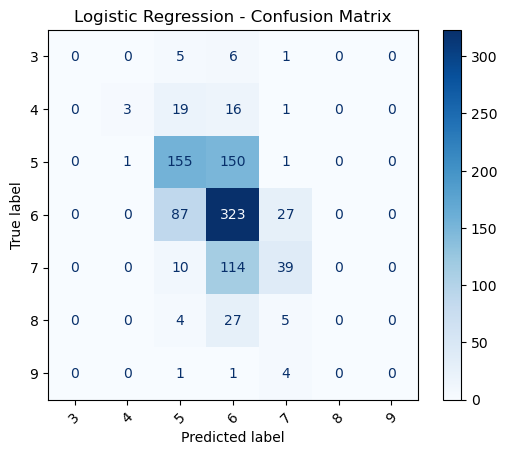

In [23]:
y_pred_lr = log_reg.predict(X_scaled)
results2.append(evaluate_model("Logistic Regression", y, y_pred_lr))

SVM - Accuracy: 0.538, Macro F1-score: 0.222


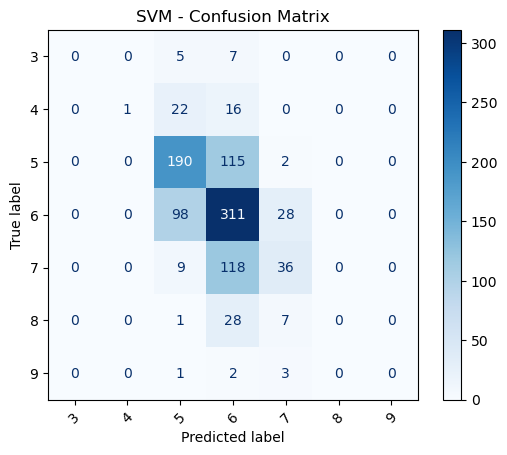

In [24]:
y_pred_svm = svm_clf.predict(X_scaled)
results2.append(evaluate_model("SVM", y, y_pred_svm))

kNN - Accuracy: 0.518, Macro F1-score: 0.245


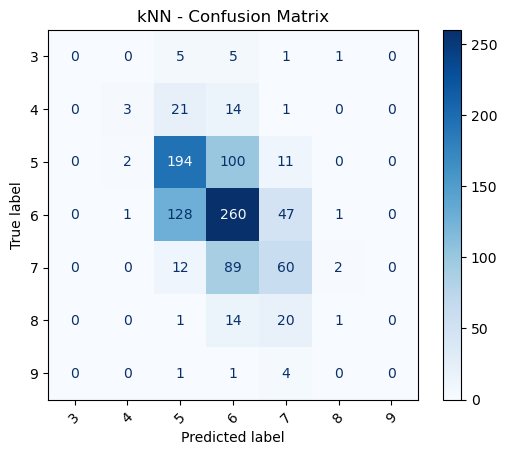

In [25]:
y_pred_knn = knn.predict(X_scaled)
results2.append(evaluate_model("kNN", y, y_pred_knn))

Decision Tree - Accuracy: 0.459, Macro F1-score: 0.255


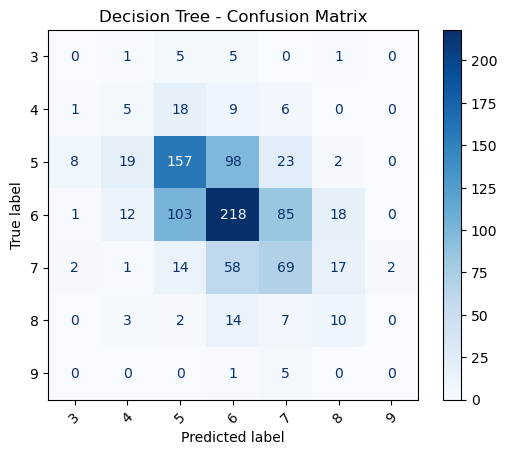

In [26]:
y_pred_tree = tree_clf.predict(X_scaled)
results2.append(evaluate_model("Decision Tree", y, y_pred_tree))

Random Forest - Accuracy: 0.608, Macro F1-score: 0.326


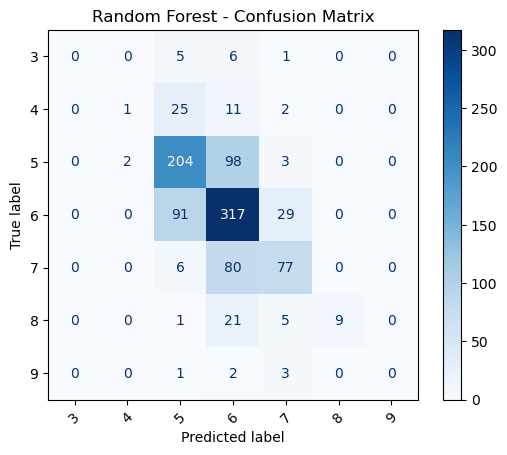

In [27]:
y_pred_rf = rf_clf.predict(X_scaled)
results2.append(evaluate_model("Random Forest", y, y_pred_rf))

KMeans - Accuracy: 0.457, Macro F1-score: 0.191


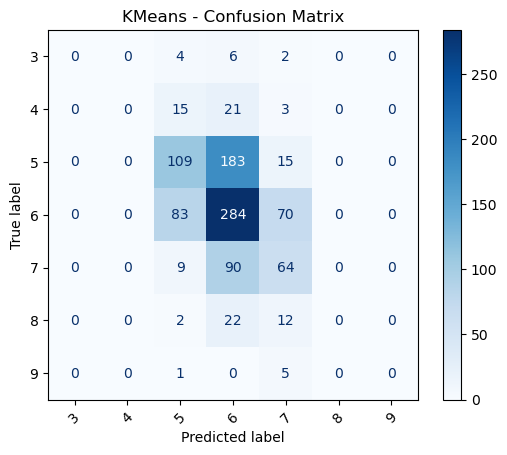

In [28]:
cluster_labels_pred = kmeans.predict(X_scaled)
cluster_mapped = cluster_mapped = np.array([mapping[c] for c in cluster_labels_pred])
results2.append(evaluate_model("KMeans", y, cluster_mapped))

32/32 [==============================] - 0s 968us/step
Neural Network - Accuracy: 0.394, Macro F1-score: 0.154


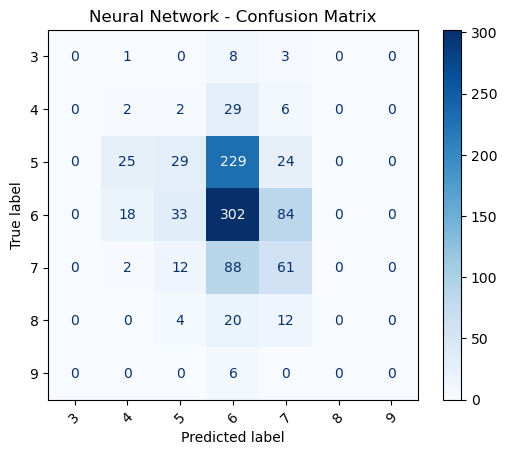

In [29]:
y_pred_nn = model.predict(X_scaled)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1) + min(unique_classes)
# Adjust labels if classes are not starting at 0
y_pred_nn_adj = np.argmax(y_pred_nn, axis=1) + label_offset

results2.append(evaluate_model("Neural Network", y, y_pred_nn_adj))


📊 Model Comparison for train set
                 Model  Accuracy  F1-score
4        Random Forest  0.615385  0.329953
1                  SVM  0.529060  0.210026
2                  kNN  0.529060  0.247807
0  Logistic Regression  0.516239  0.223119
3        Decision Tree  0.479487  0.282995
5               KMeans  0.470085  0.196064
6       Neural Network  0.370085  0.137262


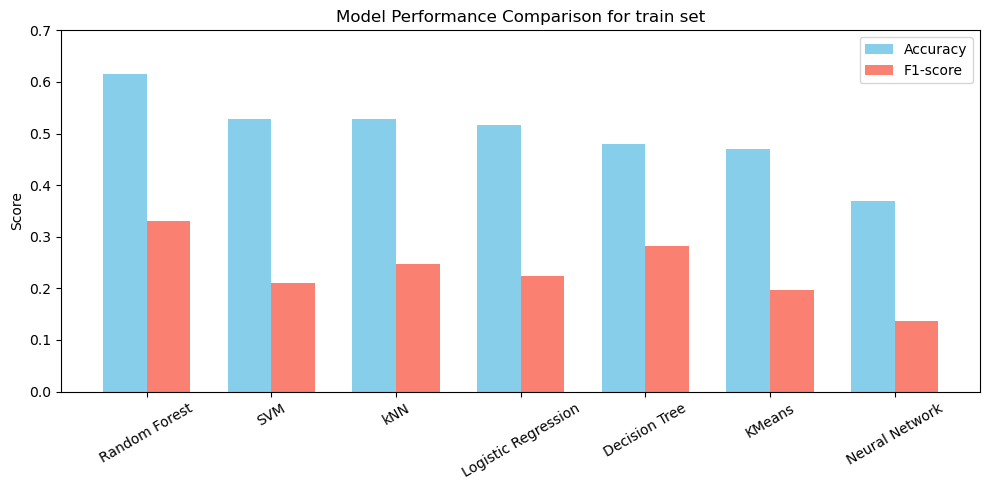


📊 Model Comparison for test set
                 Model  Accuracy  F1-score
4        Random Forest     0.608  0.325936
1                  SVM     0.538  0.221874
0  Logistic Regression     0.520  0.227412
2                  kNN     0.518  0.245454
3        Decision Tree     0.459  0.255110
5               KMeans     0.457  0.191305
6       Neural Network     0.394  0.154461


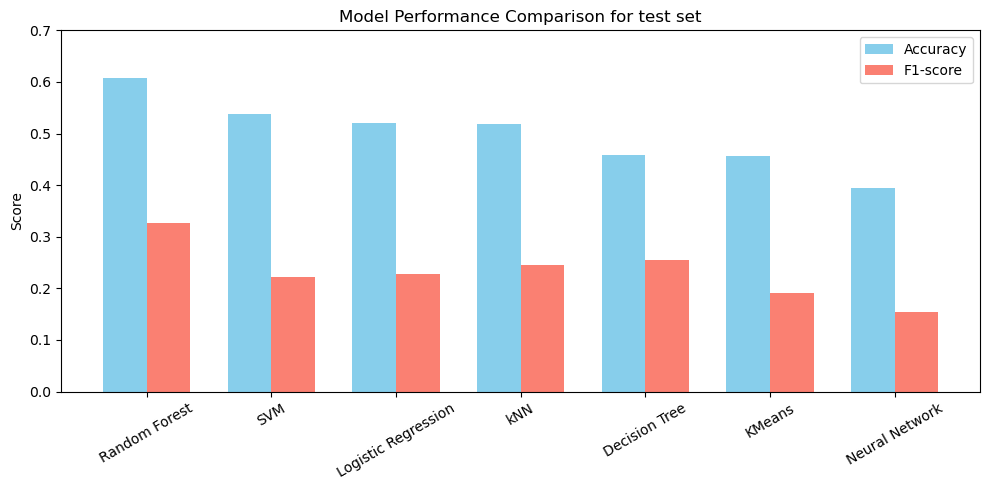

In [30]:
# === 13. Comparison Table ===
models_comparison(results1," for train set")
models_comparison(results2," for test set")

In [31]:
# === 14. Save predicted values in files ===
pd.DataFrame({'id':y.index.to_numpy(),'quality': y_pred_lr}).to_csv('predictions_lr.csv', index=False)
pd.DataFrame({'id':y.index.to_numpy(),'quality':y_pred_svm}).to_csv('predictions_svm.csv', index=False)
pd.DataFrame({'id':y.index.to_numpy(),'quality':y_pred_knn}).to_csv('predictions_knn.csv', index=False)
pd.DataFrame({'id':y.index.to_numpy(),'quality':y_pred_tree}).to_csv('predictions_tree.csv', index=False)
pd.DataFrame({'id':y.index.to_numpy(),'quality':y_pred_rf}).to_csv('predictions_rf.csv', index=False)
pd.DataFrame({'id':y.index.to_numpy(),'quality':cluster_mapped}).to_csv('predictions_kmeans.csv', index=False)
pd.DataFrame({'id':y.index.to_numpy(),'quality':y_pred_nn_adj}).to_csv('predictions_nn.csv', index=False)

# from google.colab import files
# files.download('predictions_nn.csv')  # Change the file name according to the model you want to download